# PageRank as Random Walks 
This notebook was made to complement the random walk PageRank activity described [here](https://www.teachengineering.org/activities/view/csm-2353-acting-algorithm-google-pagerank-activity). We use the network from Figure 14.6 from Easley and Kleinberg's _Networks, Crowds, and Markets_, which is reproduced below. 

The code below uses the network represented in the figure below to generate a random walk over the nodes. Given the current state, the code waits a given amount of time before "telling" the class where to throw the ball to. Additional code which includes _teleportation_ on the network is at the end of this notebook.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import networkx as nx

In [34]:
def PageRank_matrix(A):
    D = np.sum(A, axis = 1)
    return np.diag(1/D)@A

def pass_ball(i, N):
    n = len(N)
    pass_to = random.choices(range(0,n), list(N[i, :]))[0]
    return pass_to

def Random_Walk(A, K):
    N = PageRank_matrix(A)
    n = len(N)
    marbles = np.zeros(n)
    i = random.choice(range(0, n))
    marbles[i] += 1
    
    for k in range(K):
        i = pass_ball(i, N)
        marbles[i] += 1
    return marbles

def Throw_To(i, A):
    N = PageRank_matrix(A)
    n = len(N)
    next_i = pass_ball(i, N)
    print("Throw to {}!".format(next_i))
    return next_i

In [29]:
A = np.zeros((8,8))
A[0,1:3] = 1; A[1, 3:5] = 1; A[ 2, 5:7] = 1
A[3, 0] = 1; A[3:5, -1] = 1; A[5:, 0] = 1

In [30]:
N = PageRank_matrix(A)
n = len(N)

## The network
It's helpful to layout the network on the ground ahead of time in a relatively similar configuration to what is below. You can also configure it differently if you want the students to have to throw the ball further for more chaos.

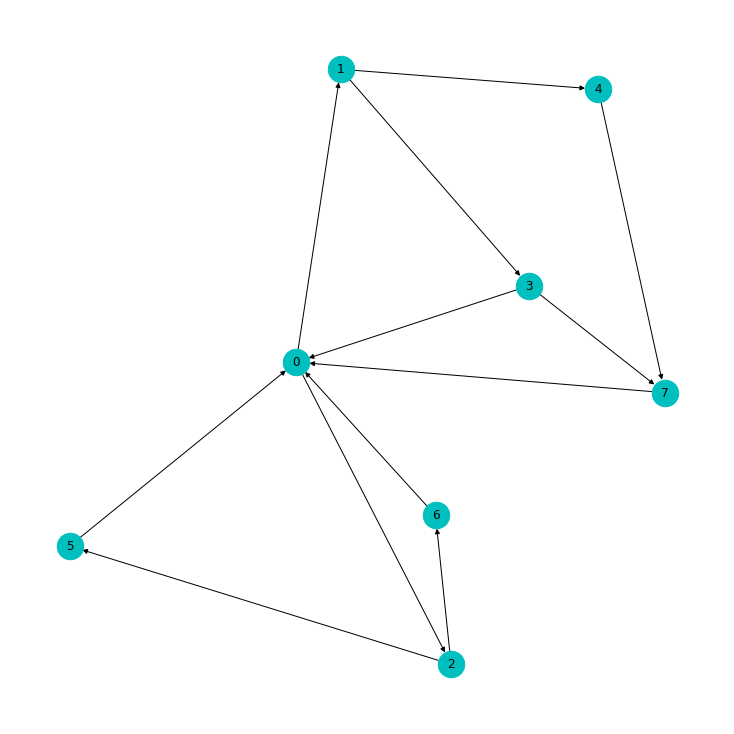

In [33]:
g = nx.from_numpy_array(A, create_using = nx.DiGraph)
pos = nx.spring_layout(g, k = 0.4)
plt.figure(figsize = (10,10))
nx.draw(g, pos, node_color = 'c', with_labels= True, node_size = 700)

## Random Walk on the Network

To increase the time between choices, change the `T` parameter below. Otherwise, the following code makes a new choice for the random walk dependent on the current state, and "yells" the next movement every `T` seconds. This code runs much longer than you'll likely need it to, so you'll need to manually stop it once the first group has used up all their marbles.

In [35]:
T = 5
i = random.choice(range(0,n))

print("Start at node {}.".format(i))
for k in range(100):
    i = Throw_To(i, A)
    time.sleep(T)

Start at node 1.
Throw to 3!


KeyboardInterrupt: 

### The distribution of marbles in each group's jar 
if we had continued the exercise for _much_ longer

<BarContainer object of 8 artists>

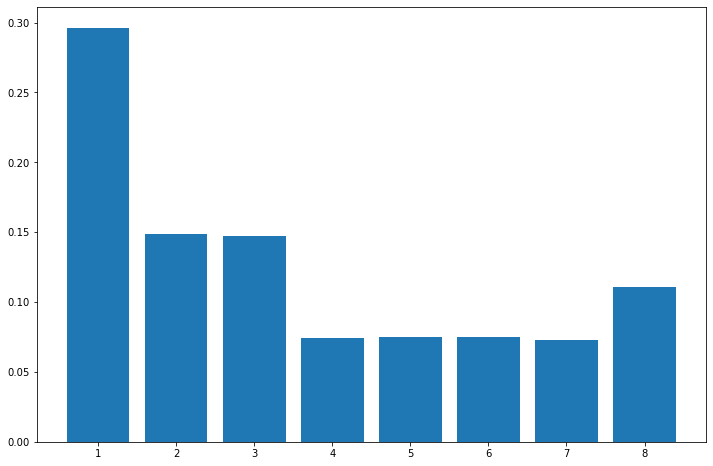

In [22]:
marbles = Random_Walk(A, 100000)
nodes = ['1', '2', '3', '4', '5', '6', '7', '8']
plt.figure(figsize = (12, 8))
plt.bar(nodes, marbles/np.sum(marbles))

### The limiting distribution of marbles in each group's jar 
if we had continued the exercise for an infinite amount of time

<BarContainer object of 8 artists>

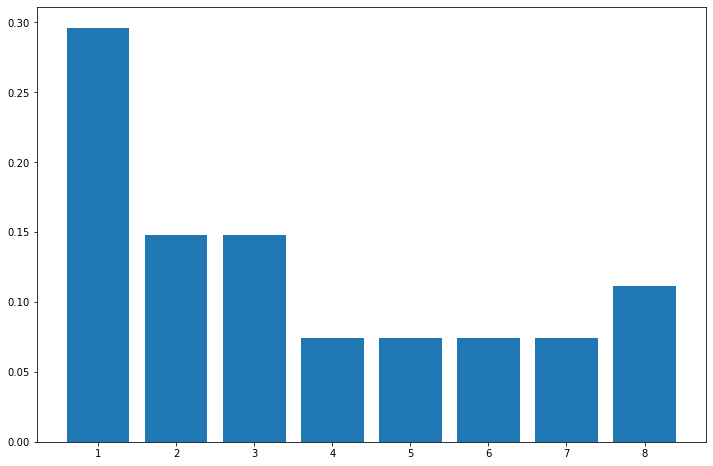

In [24]:
w, v = np.linalg.eig(N.T)
V = v[:,0]/ np.sum(v[:,0])
plt.figure(figsize = (12, 8))
plt.bar(nodes, V)

## Scaled PageRank with Teleportation

We slightly adapt the code above to include _teleportation_, which is the random walk interpretation of Scaled PageRank. The probability for which the ball is teleported to another random node, not necessarily a neighbour of the current node, is $1-s$, where the default value is `s=0.8`. 

As with the first exercise, the code below chooses a random node at which to start the random walk. Then at each step a random neighbour is chosen with probability `s`, and with probability `1-s`, the ball needs to teleport to a randomly selected node in the network. The code runs much longer than you'll likely need it to, so you'll need to manually stop it once the first group has used up all their marbles. 

In [26]:
def Teleportation(i, A, s = 0.8):
    ts = [s, 1-s]
    N = PageRank_matrix(A)
    n = len(N)
    teleport = random.choices([False, True], ts)[0]
    if teleport:
        next_i = random.choice(range(0,n))
        print("TELEPORT TO NODE {}!".format(next_i))
        return next_i
    else:
        next_i = pass_ball(i, N)
        print("Throw to {}!".format(next_i))
        return next_i

In [36]:
i = random.choice(range(0,n))
T = 3
print("Start at node {}.".format(i))
for k in range(100):
    i = Teleportation(i, A)
    time.sleep(T)

Start at node 5.
Throw to 0!


KeyboardInterrupt: 